In [3]:
# Clustering of timeseries data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

In [2]:
df = pd.read_csv('./aggregate_products.csv')

df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sku_key,tran_date,sales,selling_price,avg_discount,sku_department,sku_subdepartment,sku_category,sku_subcategory
0,28,2016-03-02,1,89.9,0.0,TY,06,063,20G
1,28,2016-03-03,0,89.9,0.0,TY,06,063,20G
2,28,2016-03-04,0,89.9,0.0,TY,06,063,20G
3,28,2016-03-05,0,89.9,0.0,TY,06,063,20G
4,28,2016-03-06,0,89.9,0.0,TY,06,063,20G


In [4]:
dummies = pd.get_dummies(df[['sku_department', 'sku_subdepartment', 'sku_category', 'sku_subcategory']])

df = df[['sku_key', 'tran_date', 'sales', 'selling_price']].join(dummies)

In [5]:
df['tran_date'] = pd.to_datetime(df['tran_date'])

In [6]:
df['month'] = df['tran_date'].apply(lambda x: x.month)
df['day'] = df['tran_date'].apply(lambda x: x.day)
df['year'] = df['tran_date'].apply(lambda x: x.year)

In [7]:
df.head()

,sku_key,tran_date,sales,selling_price,sku_department_AM,sku_department_BC,sku_department_BH,sku_department_BY,sku_department_CF,sku_department_PM,...,sku_subcategory_R01,sku_subcategory_RBA,sku_subcategory_SG2,sku_subcategory_SP5,sku_subcategory_SPD,sku_subcategory_ST5,sku_subcategory_ST9,month,day,year
0,28,2016-03-02,1,89.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,2,2016
1,28,2016-03-03,0,89.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,2016
2,28,2016-03-04,0,89.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4,2016
3,28,2016-03-05,0,89.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,5,2016
4,28,2016-03-06,0,89.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,6,2016


In [8]:
df.shape

(1674162, 568)

In [117]:
limit = 10000

In [134]:
scale = MinMaxScaler()
skus = df['sku_key']
X = df.drop(['tran_date', 'day', 'month', 'year'], axis=1)
X.set_index('sku_key', inplace=True)
X[['sales', 'selling_price']] = scale.fit_transform(X[['sales', 'selling_price']])
X = X[:limit]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [135]:
X.shape

(10000, 563)

## t-SNE

In [120]:
dimred = TSNE()

In [121]:
plot_df = dimred.fit_transform(X)

In [122]:
plot_df = pd.DataFrame(plot_df).join(df[:limit])

In [123]:
plot_df.head()

,0,1,sku_key,tran_date,sales,selling_price,sku_department_AM,sku_department_BC,sku_department_BH,sku_department_BY,...,sku_subcategory_R01,sku_subcategory_RBA,sku_subcategory_SG2,sku_subcategory_SP5,sku_subcategory_SPD,sku_subcategory_ST5,sku_subcategory_ST9,month,day,year
0,25.136538,42.601280,28,2016-03-02,1,89.9,0,0,0,0,...,0,0,0,0,0,0,0,3,2,2016
1,25.460018,43.006954,28,2016-03-03,0,89.9,0,0,0,0,...,0,0,0,0,0,0,0,3,3,2016
2,25.460018,43.006954,28,2016-03-04,0,89.9,0,0,0,0,...,0,0,0,0,0,0,0,3,4,2016
3,25.461451,43.005379,28,2016-03-05,0,89.9,0,0,0,0,...,0,0,0,0,0,0,0,3,5,2016
4,25.460018,43.006954,28,2016-03-06,0,89.9,0,0,0,0,...,0,0,0,0,0,0,0,3,6,2016


In [124]:
dimred.kl_divergence_

0.20850065350532532

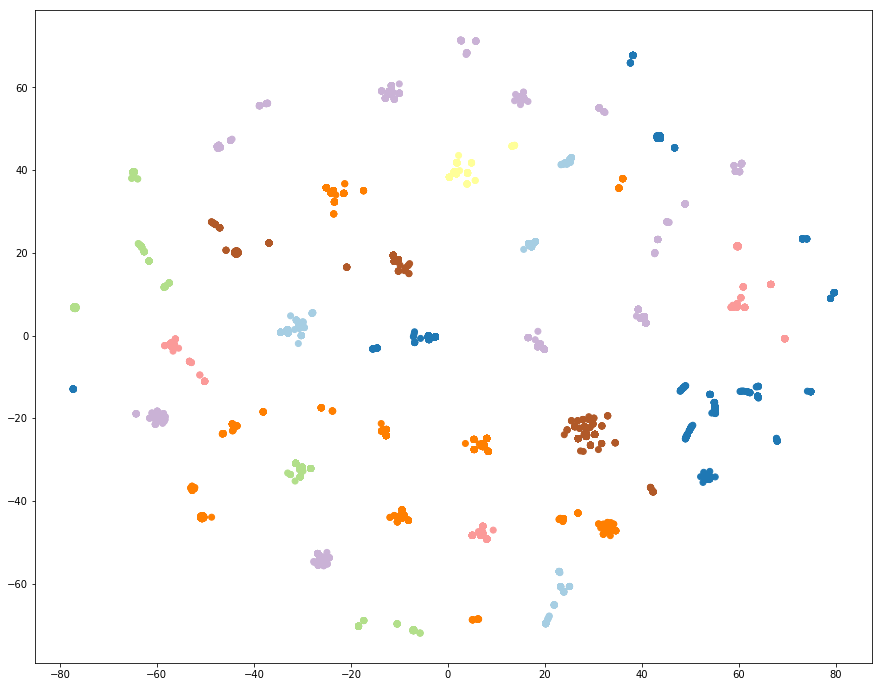

In [125]:
f, ax = plt.subplots(figsize=(15,12))

ax.scatter(plot_df[0], plot_df[1], c=plot_df['sku_key'], cmap='Paired')

In [136]:
plot_df['sku_key'].unique()

array([ 28,  34, 100, 152, 182, 325, 521, 523, 527, 585, 586, 588, 740,
       806, 808], dtype=int64)

In [137]:
maping_dict = {}
for i, j in enumerate(plot_df['sku_key'].unique()):
    maping_dict[j] = i

In [138]:
skus = skus.map(maping_dict)[:limit]

In [139]:
skus = skus.astype(int)

## Self Organizing Maps

In [59]:
from minisom import MiniSom

In [149]:
som = MiniSom(x=20, y=20, input_len=563, learning_rate=0.1)

In [150]:
X = X.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [154]:
som.random_weights_init(X)
som.train_random(X, 500)

In [152]:
from pylab import bone, pcolor, colorbar, plot, show

In [ ]:
bone()
pcolor(som.distance_map().T)
colorbar()

colors = ['r', 'b', 'g', 'y', 'b', 'c', 'm', 'gold',
          'orange', 'skyblue', 'olive', 'orchid', 'lime',
          'navy', 'crimson']
for i, j in enumerate(X):
    w = som.winner(j)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         'o',
         markeredgecolor = colors[skus[i]],
        markerfacecolor = 'None', 
        markersize=10,
        markeredgewidth=2)
show()